In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/IOT_course

/content/drive/MyDrive/IOT_course


In [4]:
ls

coco.names  image.jpg  yolov4.cfg  yolov4.weights


Code when it detects all objects

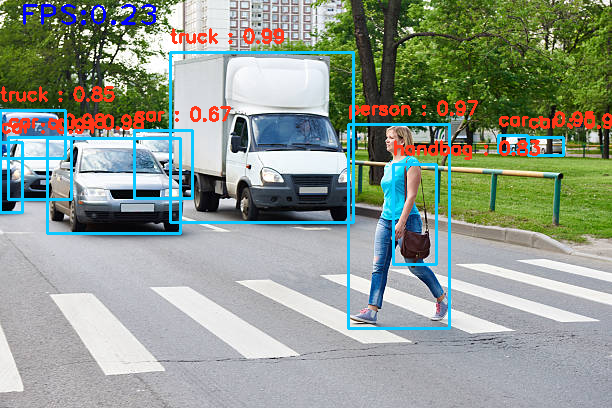

In [7]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3 #non-maxi?? score to detect empty boxes?? non-maximum suprresion
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/istockphoto-478525372-612x612.jpg")
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms) # common practice to take time befoe and after using model.detect
y= time.time()
fps=1/(y-x) # frames per second
for (classid, score, box) in zip(classes, scores, boxes):
  if isinstance(classid, (list, np.ndarray)):
    classid_value = classid[0]
  else:
    classid_value = classid
# Check if score is a list or a scalar
  if isinstance(score, (list, np.ndarray)):
    score_value = score[0]
  else:
    score_value = score
    label = "%s : %.2f" % (class_names[classid_value], score_value)
    cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
    cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
    cv2.putText(img, "FPS:{0:.2f}".format(fps),(20, 25), cv2.FONT_HERSHEY_PLAIN,fontScale=2,color=(255, 0, 0),thickness=2)
cv2_imshow(img)

code to detect only people

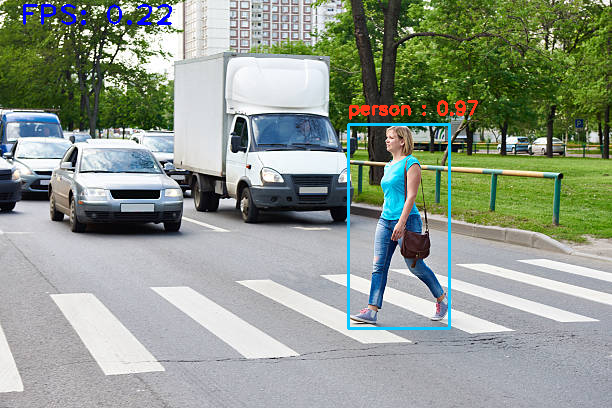

In [8]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms = 0.3
class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/istockphoto-478525372-612x612.jpg")
arc = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640, 640), scale=1 / 255, swapRB=True)
x = time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y = time.time()
fps = 1 / (y - x)

for (classid, score, box) in zip(classes, scores, boxes):
    if isinstance(classid, (list, np.ndarray)):
        classid_value = classid[0]
    else:
        classid_value = classid
    if isinstance(score, (list, np.ndarray)):
        score_value = score[0]
    else:
        score_value = score

    class_name = class_names[classid_value]
    if class_name == 'person':
        label = "%s : %.2f" % (class_name, score_value)
        cv2.rectangle(img, box, color=(255, 200, 10), thickness=2)
        cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (25, 55, 255), 2)

cv2.putText(img, "FPS: {0:.2f}".format(fps), (20, 25), cv2.FONT_HERSHEY_PLAIN, fontScale=2, color=(255, 0, 0), thickness=2)
cv2_imshow(img)


simplified code for detecting all objects

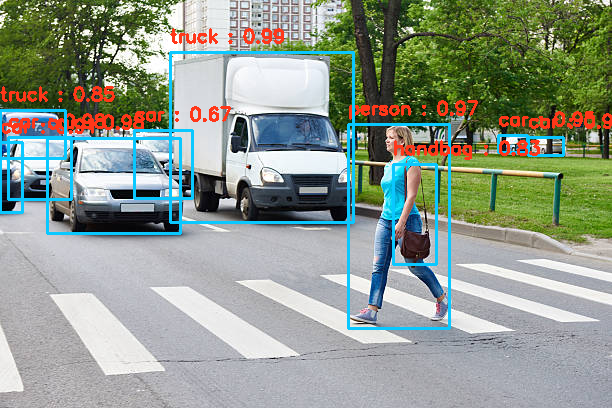

In [17]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/istockphoto-478525372-612x612.jpg")
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
for (classid, score, box) in zip(classes, scores, boxes):
        label = "%s : %.2f" % (class_names[classid],score)
        cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
        cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
cv2_imshow(img)

modifying the simplified code to detect only people

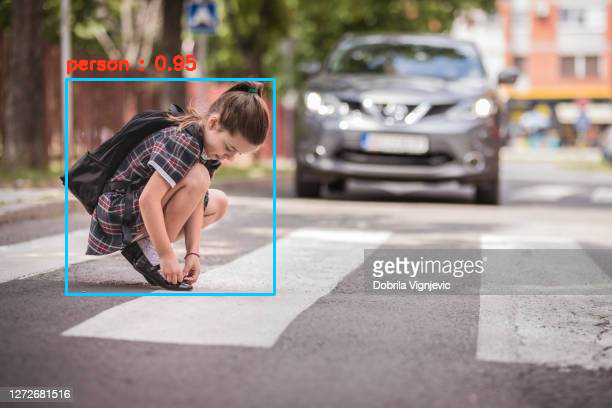

In [9]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms = 0.3
class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/gettyimages-1272681516-612x612.jpg")
arc = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640, 640), scale=1 / 255, swapRB=True)
x = time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)

for (classid, score, box) in zip(classes, scores, boxes):
    class_name = class_names[int(classid)]
    # if class_names[classid[0]] == 'person':
    if class_name == 'person':  # Filter only 'person' detections
        label = "%s : %.2f" % (class_name, score)
        cv2.rectangle(img, box, color=(255, 200, 10), thickness=2)
        cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (25, 55, 255), 2)

cv2_imshow(img)


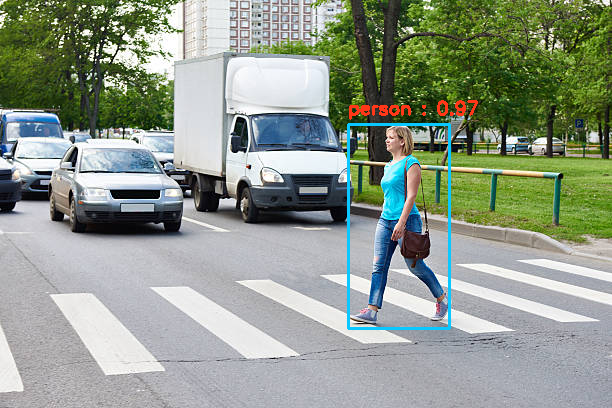

In [16]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms = 0.3
class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/istockphoto-478525372-612x612.jpg")
arc = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640, 640), scale=1 / 255, swapRB=True)
x = time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)

for (classid, score, box) in zip(classes, scores, boxes):
    class_name = class_names[int(classid)]
    if class_name == 'person':  # Filter only 'person' detections
        label = "%s : %.2f" % (class_name, score)
        cv2.rectangle(img, box, color=(255, 200, 10), thickness=2)
        cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (25, 55, 255), 2)

cv2_imshow(img)
